## Step 0: Imports & Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### Exploratory Data Analysis (EDA)

#### Structural Analysis
- **Target Variable**:  
- **Rows and Columns**: 464 rows, 16 col
- **Variable Types**: 81.28% Quantitaives, 18.75% Qualitatives
- **Missing Value Analysis**:  
  - Part 01: Columns with 100% of values  
  - Part 02: Columns with (5%-10%) Missing
  - Part 03: Columns with (>20%) Missing  

#### Content Analysis
- **Target Visualization**:  
  - Upper middle income: **%**  
  

In [2]:
# Reading the Data
water_df = pd.read_csv('Estimates of the use of water (2000-2020).csv')
water_df.head(5)

,name,year,pop_n,pop_u,wat_bas_n,wat_lim_n,wat_unimp_n,wat_sur_n,wat_bas_r,wat_lim_r,wat_unimp_r,wat_sur_r,wat_bas_u,wat_lim_u,wat_unimp_u,wat_sur_u
0,Croatia,2020,4105.268066,57.552998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0,0.000000,0
1,Croatia,2015,4232.874023,56.155003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0,0.000000,0
2,Argentina,2020,45195.77734,92.111000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.790421,0.0,0.209579,0
3,Greece,2015,10659.7373,78.046005,100.000005,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.000000,0.0,0.000000,0
4,Andorra,2020,77.26499939,87.916000,100.000004,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.000000,0.0,0.000000,0


 ## Step 01: Data Understanding  
 - Dataframe shape
 - head & tail
 - dtypes
 - describe

In [3]:
water_df.shape

(464, 16)

In [4]:
water_df.head(5)

,name,year,pop_n,pop_u,wat_bas_n,wat_lim_n,wat_unimp_n,wat_sur_n,wat_bas_r,wat_lim_r,wat_unimp_r,wat_sur_r,wat_bas_u,wat_lim_u,wat_unimp_u,wat_sur_u
0,Croatia,2020,4105.268066,57.552998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0,0.000000,0
1,Croatia,2015,4232.874023,56.155003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0,0.000000,0
2,Argentina,2020,45195.77734,92.111000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.790421,0.0,0.209579,0
3,Greece,2015,10659.7373,78.046005,100.000005,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.000000,0.0,0.000000,0
4,Andorra,2020,77.26499939,87.916000,100.000004,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.000000,0.0,0.000000,0


In [5]:
water_df.dtypes

name            object
year             int64
pop_n           object
pop_u          float64
wat_bas_n      float64
wat_lim_n      float64
wat_unimp_n    float64
wat_sur_n      float64
wat_bas_r      float64
wat_lim_r      float64
wat_unimp_r    float64
wat_sur_r      float64
wat_bas_u      float64
wat_lim_u      float64
wat_unimp_u    float64
wat_sur_u       object
dtype: object

In [6]:
# Data dtype
water_df.dtypes.value_counts(normalize= True)* 100

float64    75.00
object     18.75
int64       6.25
Name: proportion, dtype: float64

In [7]:
# Column_names
water_df.columns

Index(['name', 'year', 'pop_n', 'pop_u', 'wat_bas_n', 'wat_lim_n',
       'wat_unimp_n', 'wat_sur_n', 'wat_bas_r', 'wat_lim_r', 'wat_unimp_r',
       'wat_sur_r', 'wat_bas_u', 'wat_lim_u', 'wat_unimp_u', 'wat_sur_u'],
      dtype='object')

In [8]:
water_df.describe()

,year,pop_u,wat_bas_n,wat_lim_n,wat_unimp_n,wat_sur_n,wat_bas_r,wat_lim_r,wat_unimp_r,wat_sur_r,wat_bas_u,wat_lim_u,wat_unimp_u
count,464.000000,464.000000,461.000000,461.000000,461.000000,446.000000,339.000000,339.000000,339.000000,330.000000,364.000000,364.000000,364.000000
mean,2017.398707,60.890215,89.174871,3.675032,4.984907,2.238010,79.453935,5.846687,9.712588,5.122794,94.170999,3.292272,2.135052
std,2.459714,25.052383,15.489866,6.513164,7.522532,4.420156,22.426280,8.269319,12.190953,7.732253,8.141636,5.380358,3.508875
min,2015.000000,0.000000,37.202402,0.000000,0.000000,0.000000,20.622514,0.000000,0.000000,0.000000,49.661665,0.000000,0.000000
25%,2015.000000,41.839750,85.495601,0.000000,0.108476,0.000000,62.353529,0.000000,0.352567,0.000000,91.009838,0.000000,0.000000
50%,2015.500000,62.281998,96.604139,0.406530,1.344803,0.009381,89.875800,1.804724,4.310939,0.713097,97.836161,0.671124,0.639986
75%,2020.000000,81.416750,99.765173,4.692599,6.163618,2.303579,98.587231,8.768605,15.371147,7.727167,99.866205,4.234145,2.662380
max,2020.000000,100.000000,100.000005,37.426963,34.719560,35.443486,100.000000,42.164381,51.215982,41.629254,100.000000,34.279780,19.835807


In [9]:
(water_df.isna().sum()/water_df.shape[0]).sort_values(ascending=False)

wat_sur_r      0.288793
wat_bas_r      0.269397
wat_lim_r      0.269397
wat_unimp_r    0.269397
wat_sur_u      0.221983
wat_bas_u      0.215517
wat_lim_u      0.215517
wat_unimp_u    0.215517
wat_sur_n      0.038793
wat_bas_n      0.006466
wat_lim_n      0.006466
wat_unimp_n    0.006466
name           0.000000
year           0.000000
pop_n          0.000000
pop_u          0.000000
dtype: float64

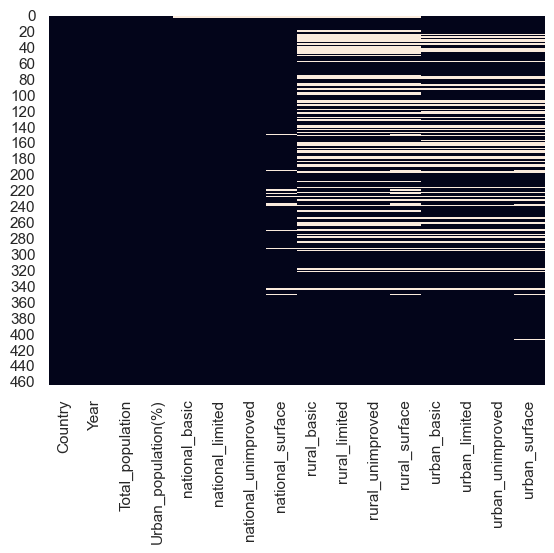

In [226]:
# Missing Values Heatmap for Water Data Columns
plt.figure()

sns.heatmap(water_df.isna(), cbar= False)
plt.show()

 ## Step 02: Data Preperation
 - Dropping irrelevant columns & rows
 - Identifying duplicated columns
 - Renaming columns 
 - Feature creation

#### Forentelly we don't have a duplicated rows in our Dataset

In [11]:
# Duplicated values 
water_df.duplicated().sum()

0

In [4]:
# Change column names

new_col = {'name': 'Country',
           'year': 'Year',
           'pop_n': 'Total_population',
           'pop_u': 'Urban_population(%)',
           'wat_bas_n': 'national_basic',
           'wat_lim_n': 'national_limited',
           'wat_unimp_n': 'national_unimproved',
           'wat_sur_n': 'national_surface',
           'wat_bas_r': 'rural_basic',
           'wat_lim_r': 'rural_limited',
           'wat_unimp_r': 'rural_unimproved',
           'wat_sur_r': 'rural_surface',
           'wat_bas_u': 'urban_basic',
           'wat_lim_u': 'urban_limited',
           'wat_unimp_u': 'urban_unimproved',
           'wat_sur_u': 'urban_surface' }

water_df.rename(columns= new_col, inplace = True)


In [5]:
water_df.head()

,Country,Year,Total_population,Urban_population(%),national_basic,national_limited,national_unimproved,national_surface,rural_basic,rural_limited,rural_unimproved,rural_surface,urban_basic,urban_limited,urban_unimproved,urban_surface
0,Croatia,2020,4105.268066,57.552998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0,0.000000,0
1,Croatia,2015,4232.874023,56.155003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.0,0.000000,0
2,Argentina,2020,45195.77734,92.111000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.790421,0.0,0.209579,0
3,Greece,2015,10659.7373,78.046005,100.000005,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.000000,0.0,0.000000,0
4,Andorra,2020,77.26499939,87.916000,100.000004,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.000000,0.0,0.000000,0


In [6]:
water_df.dtypes

Country                 object
Year                     int64
Total_population        object
Urban_population(%)    float64
national_basic         float64
national_limited       float64
national_unimproved    float64
national_surface       float64
rural_basic            float64
rural_limited          float64
rural_unimproved       float64
rural_surface          float64
urban_basic            float64
urban_limited          float64
urban_unimproved       float64
urban_surface           object
dtype: object

In [33]:
# changing data tyepes for 'Total_population' & 'urban_surface'

In [7]:
water_df['Total_population'] = pd.to_numeric(water_df['Total_population'], errors= 'coerce')
water_df['Total_population'] = water_df['Total_population'].fillna(water_df['Total_population'].mean()) 
water_df['Total_population'] = water_df['Total_population'].astype('int64')

In [9]:
water_df['urban_surface'].describe()

count    359.000000
mean       0.407271
std        0.978715
min        0.000000
25%        0.000000
50%        0.000000
75%        0.310509
max        6.762930
Name: urban_surface, dtype: float64

In [8]:
water_df['urban_surface'] = pd.to_numeric(water_df['urban_surface'], errors= 'coerce')
water_df['urban_surface'].fillna(water_df['urban_surface'].mean())
water_df['urban_surface'] = water_df['urban_surface'].astype('float64')

In [44]:
for col in water_df.select_dtypes('float64'):
    print(col)

Urban_population(%)
national_basic
national_limited
national_unimproved
national_surface
rural_basic
rural_limited
rural_unimproved
rural_surface
urban_basic
urban_limited
urban_unimproved
urban_surface


In [10]:
numerical_columns= water_df.select_dtypes('float64').columns
matrix_corr = water_df[numerical_columns].corr()

In [11]:
num_corr = water_df[numerical_columns].corr()
num_corr

,Urban_population(%),national_basic,national_limited,national_unimproved,national_surface,rural_basic,rural_limited,rural_unimproved,rural_surface,urban_basic,urban_limited,urban_unimproved,urban_surface
Urban_population(%),1.000000,0.540391,-0.442118,-0.470577,-0.453395,0.464351,-0.433940,-0.357845,-0.314017,0.477018,-0.406242,-0.360808,-0.447334
national_basic,0.540391,1.000000,-0.836848,-0.901640,-0.746723,0.959385,-0.772083,-0.820220,-0.667375,0.886993,-0.760287,-0.726765,-0.598497
national_limited,-0.442118,-0.836848,1.000000,0.603040,0.436938,-0.756212,0.961465,0.520785,0.344286,-0.815560,0.893865,0.430331,0.329608
national_unimproved,-0.470577,-0.901640,0.603040,1.000000,0.580262,-0.884474,0.525551,0.945197,0.515395,-0.790271,0.576495,0.821056,0.464410
national_surface,-0.453395,-0.746723,0.436938,0.580262,1.000000,-0.702429,0.358970,0.470040,0.921150,-0.537553,0.345695,0.493851,0.802017
rural_basic,0.464351,0.959385,-0.756212,-0.884474,-0.702429,1.000000,-0.737829,-0.884260,-0.727239,0.837857,-0.697593,-0.725095,-0.524625
rural_limited,-0.433940,-0.772083,0.961465,0.525551,0.358970,-0.737829,1.000000,0.476672,0.319104,-0.709285,0.775555,0.372641,0.291292
rural_unimproved,-0.357845,-0.820220,0.520785,0.945197,0.470040,-0.884260,0.476672,1.000000,0.493220,-0.725778,0.544891,0.747019,0.357008
rural_surface,-0.314017,-0.667375,0.344286,0.515395,0.921150,-0.727239,0.319104,0.493220,1.000000,-0.526865,0.333150,0.526559,0.646705
urban_basic,0.477018,0.886993,-0.815560,-0.790271,-0.537553,0.837857,-0.709285,-0.725778,-0.526865,1.000000,-0.900858,-0.801905,-0.495147


 ## Step 03:  Feature Understanding
> Plotting Feature Distributions
 - Heatmap
 - Scatterplot
 - Barplot

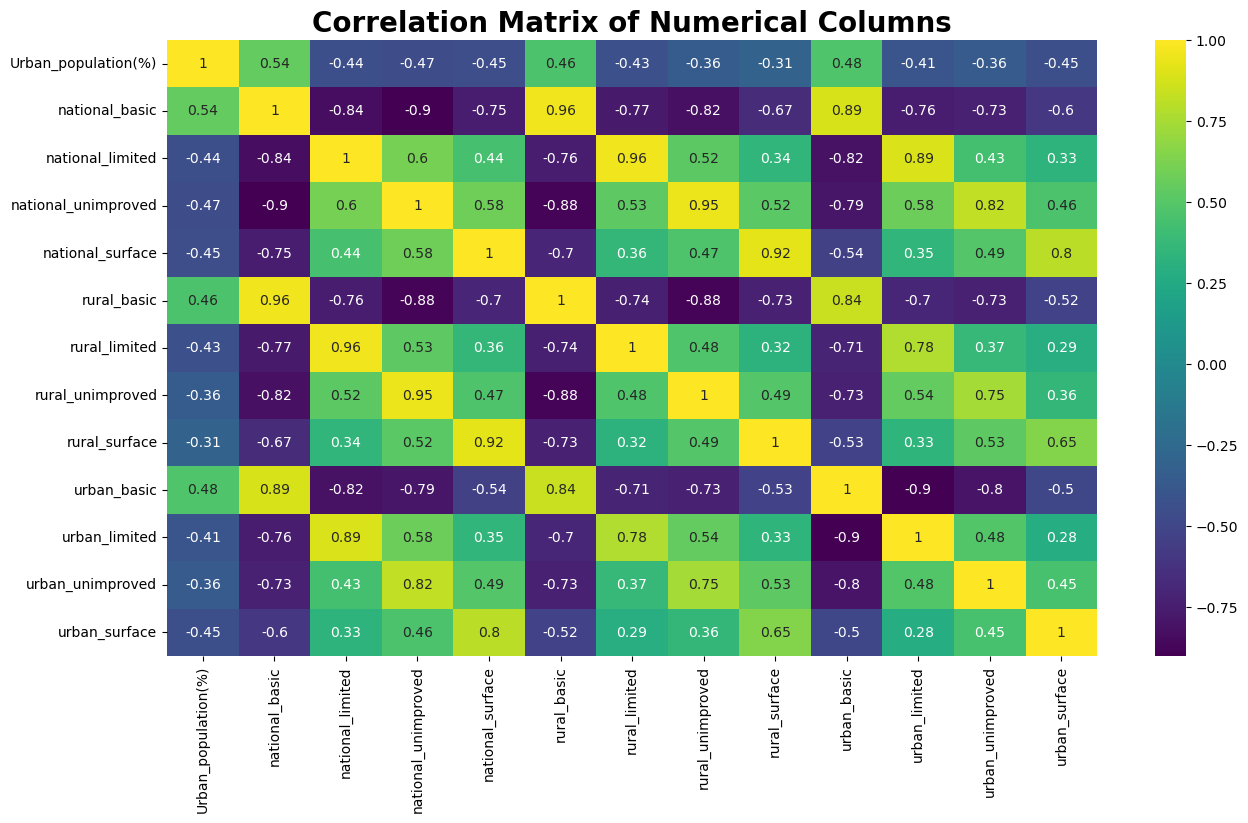

In [12]:
# Plotting the corr between numerical columns
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_corr, annot=True, cmap= 'viridis')
plt.title('Correlation Matrix of Numerical Columns',
          fontsize= 20, fontweight='bold')

plt.show()

### we remarkied same strong relationships between some columns 

In [13]:
water_df.dtypes

Country                 object
Year                     int64
Total_population         int64
Urban_population(%)    float64
national_basic         float64
national_limited       float64
national_unimproved    float64
national_surface       float64
rural_basic            float64
rural_limited          float64
rural_unimproved       float64
rural_surface          float64
urban_basic            float64
urban_limited          float64
urban_unimproved       float64
urban_surface          float64
dtype: object

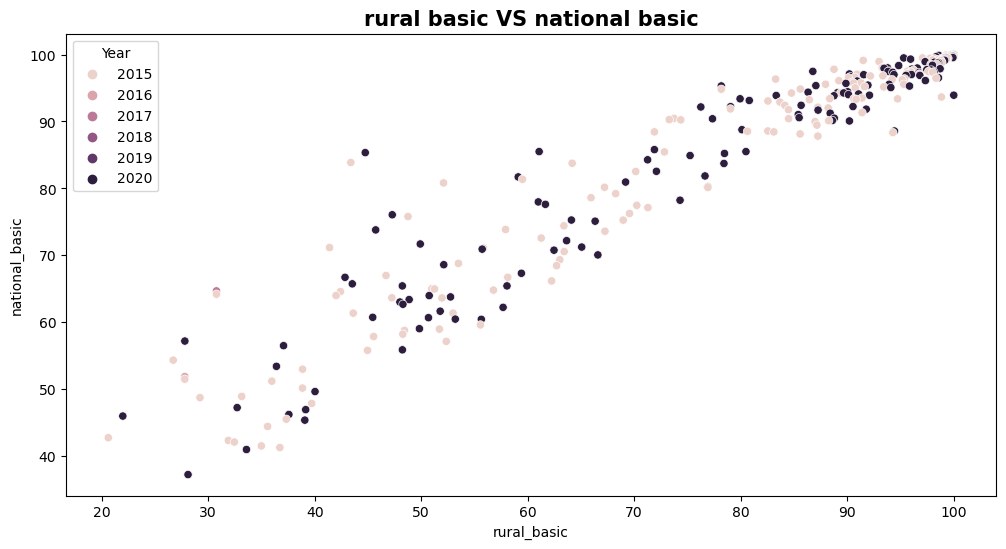

In [11]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='rural_basic', y='national_basic',
                data=water_df,
                hue='Year')
plt.title('rural basic VS national basic',
          fontsize=15, fontweight='bold')
plt.show()

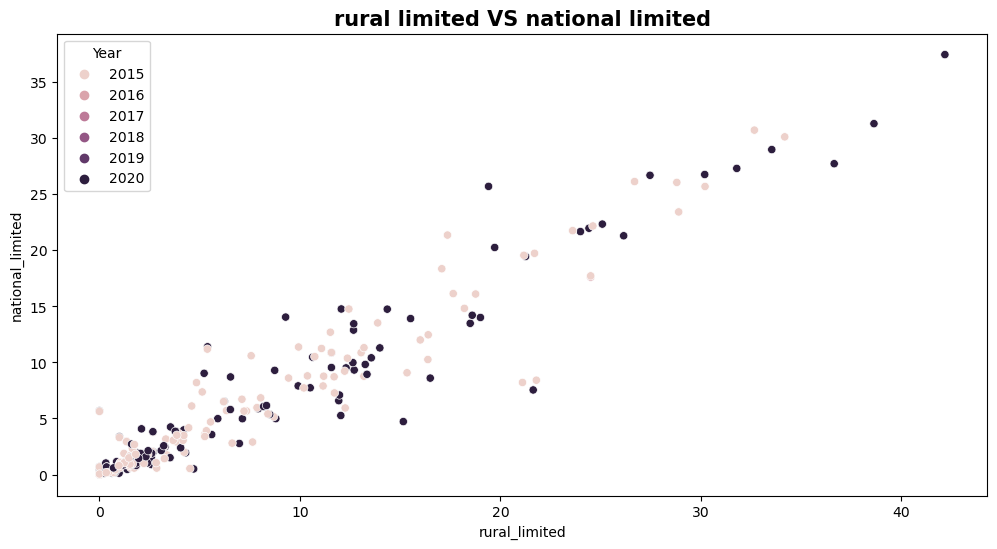

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x= 'rural_limited', y = 'national_limited',
                data= water_df,
                hue= 'Year')
plt.title('rural limited VS national limited',
          fontsize=15, fontweight='bold')
plt.show()

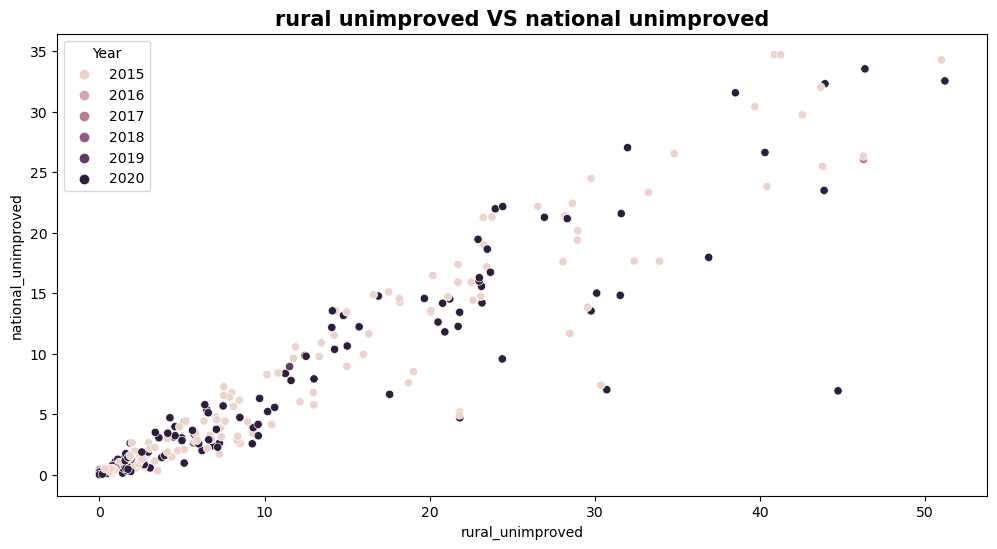

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rural_unimproved', y='national_unimproved',
                data=water_df,
                hue='Year')
           
plt.title('rural unimproved VS national unimproved',
          fontsize=15, fontweight='bold')
plt.show()

In [15]:
top10_pop_country = (
    water_df.groupby('Country')['Total_population']
    .sum()
    .sort_values(ascending=False)
    .reset_index()[:10]
)

top10_pop_country

,Country,Total_population
0,China,2893545
1,India,2690156
2,United States of America,651880
3,Indonesia,531906
4,Pakistan,420318
5,Brazil,417030
6,Nigeria,387276
7,Bangladesh,320945
8,Russian Federation,290919
9,Japan,254461


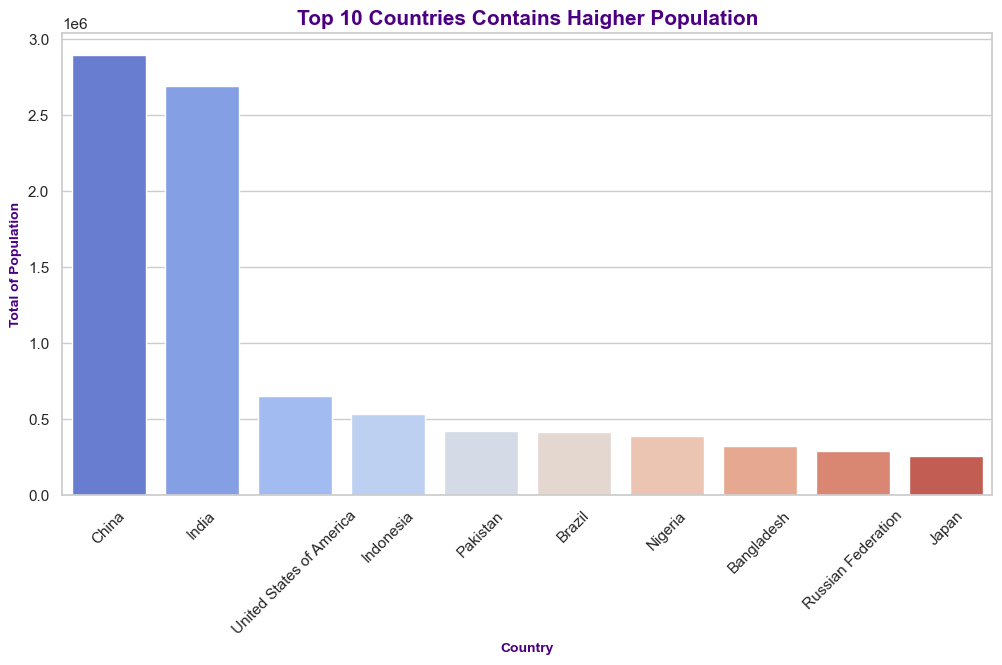

In [34]:
# Plotting to Analyze which country contains max population
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Total_population'
                ,data = top10_pop_country,
                palette= 'coolwarm')
ax.set_title('Top 10 Countries Contains Haigher Population',
             fontsize=15, fontweight ='bold', color='Indigo')

ax.set_xlabel('Country', fontsize = 10,
              fontweight='bold', color='Indigo')

ax.set_ylabel('Total of Population',
              fontsize= 10 , fontweight='bold', color='Indigo')

plt.xticks(rotation=45)
plt.show()

In [16]:
# Get the top 20 countries with highest urban population percentage
water_df.groupby('Country')['Urban_population(%)'].mean().sort_values(ascending=False).head(20)

Country
Sint Maarten (Dutch part)       100.000000
Monaco                          100.000000
Saint Martin (French part)      100.000000
China, Macao SAR                100.000000
China, Hong Kong SAR            100.000000
Saint Barthelemy                100.000000
Cayman Islands                  100.000000
Singapore                       100.000000
Bermuda                         100.000000
Gibraltar                       100.000000
Kuwait                          100.000000
Anguilla                        100.000000
Nauru                           100.000000
Réunion                          99.499004
Qatar                            99.089996
Guadeloupe                       98.470997
Belgium                          97.977497
San Marino                       97.118999
United States Virgin Islands     95.644501
Uruguay                          95.279999
Name: Urban_population(%), dtype: float64

In [17]:
# Get the top 20 countries with lowest urban population percentage
water_df.groupby('Country')['Urban_population(%)'].mean().sort_values(ascending=False).tail(20)

Country
Uganda                              23.507000
Cambodia                            23.210000
Tonga                               23.186999
Chad                                23.017501
Micronesia (Federated States of)    22.634000
Ethiopia                            20.561501
Nepal                               19.566500
South Sudan                         19.525499
Saint Lucia                         18.677999
Sri Lanka                           18.484500
Samoa                               18.401501
Rwanda                              17.218000
Malawi                              16.870000
Niger                               16.436500
Liechtenstein                       14.359500
Papua New Guinea                    13.178500
Burundi                             12.893000
Montserrat                           9.078000
Tokelau                              0.000000
Wallis and Futuna Islands            0.000000
Name: Urban_population(%), dtype: float64

In [30]:
1. # 1. Which country has the highest percentage of urban population?
urban_pop = water_df[['Country', 'Urban_population(%)']].sort_values(by='Urban_population(%)', ascending=False).head(1)
print(urban_pop)

                       Country  Urban_population(%)
74  Saint Martin (French part)                100.0


In [61]:
water_df.columns

Index(['Country', 'Year', 'Total_population', 'Urban_population(%)',
       'national_basic', 'national_limited', 'national_unimproved',
       'national_surface', 'rural_basic', 'rural_limited', 'rural_unimproved',
       'rural_surface', 'urban_basic', 'urban_limited', 'urban_unimproved',
       'urban_surface'],
      dtype='object')

In [31]:
#2. How does the percentage of the population with access to basic water services change over the years?
basic_trend = water_df.groupby('Year')['national_basic'].mean().dropna()
basic_trend

Year
2015    88.519804
2016    81.947915
2017    93.056374
2018    94.731701
2019    91.064340
2020    89.738062
Name: national_basic, dtype: float64

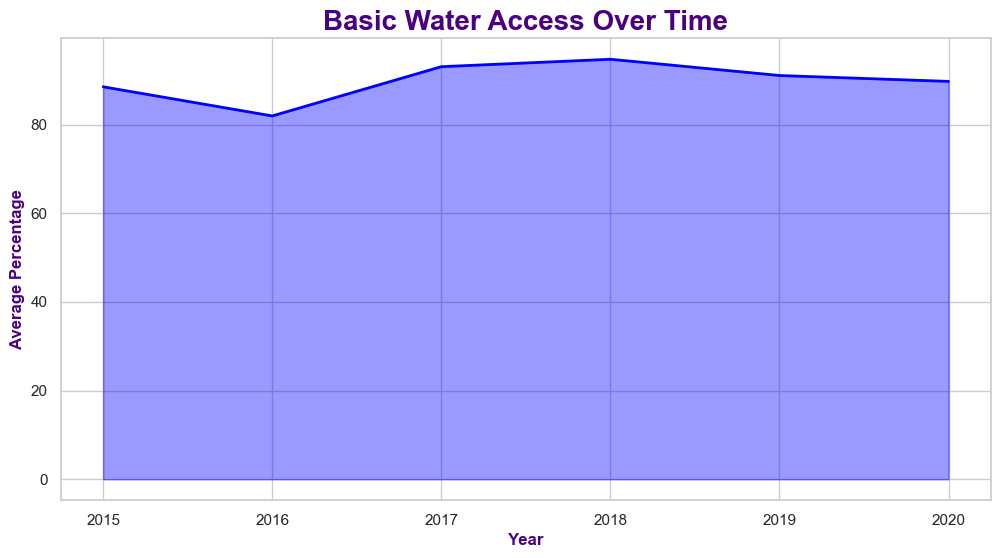

In [20]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))

ax = sns.lineplot(x=basic_trend.index, y=basic_trend.values,
                  color='blue', linewidth=2)

plt.fill_between(basic_trend.index, basic_trend.values, color='blue', alpha=0.4)

ax.set_title('Basic Water Access Over Time',
             fontsize=20, fontweight='bold', color='Indigo')

ax.set_xlabel('Year', fontsize=12
              , fontweight='bold', color='Indigo')

ax.set_ylabel('Average Percentage', fontsize=12
              , fontweight='bold', color='Indigo')

plt.show()


In [27]:
# 3. Which countries rely heavily on surface water sources?
sur_water = water_df[['Country', 'national_surface']].sort_values(by ='national_surface',
                                                      ascending=False)[:5]
print(sur_water)

              Country  national_surface
460  Papua New Guinea         35.443486
455  Papua New Guinea         30.369793
432             Kenya         21.483400
421             Kenya         19.045151
433      Sierra Leone         18.044622


In [26]:
# 4. Which countries rely heavily on surface water sources?
surface_water = water_df[water_df['national_surface'] > 10][['Country',
                                                             'national_surface']].sort_values(by='national_surface',
                                                                                                        ascending=False)[:5]
                                                             
                                                                                                            
print(surface_water)

              Country  national_surface
460  Papua New Guinea         35.443486
455  Papua New Guinea         30.369793
432             Kenya         21.483400
421             Kenya         19.045151
433      Sierra Leone         18.044622


In [28]:
# 5.Which country has the highest percentage of the population relying on unimproved water services?

high_unimproved = water_df[['Country', 'national_unimproved']].sort_values(by='national_unimproved',
                                                                           ascending=False).head(1)

print(high_unimproved)

    Country  national_unimproved
454   Niger             34.71956


# Comparing among the mean of national,basic and rural basic water over years

In [61]:
ati_rural_ur_mean = water_df.groupby('Year')[['national_basic', 'rural_basic', 
                                               'urban_basic']].mean().dropna().reset_index()
print(nati_rural_ur_mean)

   Year  national_basic  rural_basic  urban_basic
0  2015       88.519804    78.434531    93.788815
1  2016       81.947915    27.801576    92.931612
2  2017       93.056374    30.775369    90.290487
3  2019       91.064340    76.911723    88.222846
4  2020       89.738062    81.133882    94.680238


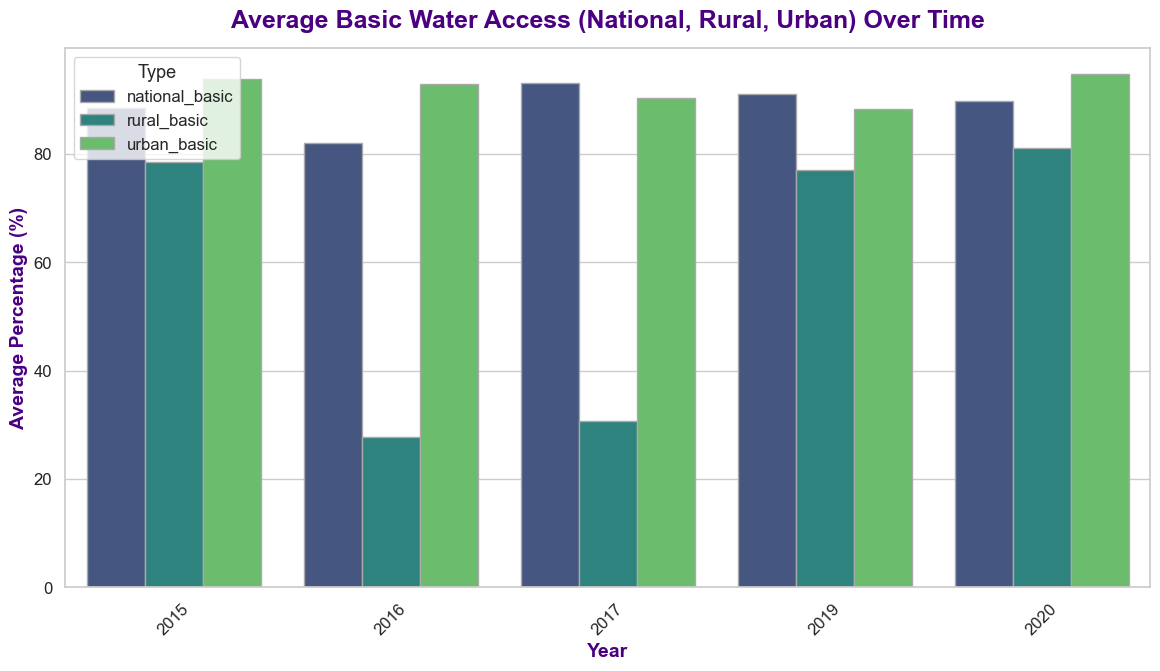

In [85]:

sns.set(style='whitegrid')


nati_rural_mean_melted = nati_rural_mean.reset_index().melt(
    id_vars='Year', value_vars=['national_basic', 'rural_basic', 'urban_basic'],
    var_name='Type', value_name='Mean Value'
)


plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Year', y='Mean Value', hue='Type',
                 data=nati_rural_mean_melted, palette='viridis', edgecolor='darkgrey')

ax.set_title('Average Basic Water Access (National, Rural, Urban) Over Time',
             fontsize=18, fontweight='bold', color='Indigo', pad=15)

ax.set_xlabel('Year', fontsize=14,
              fontweight='bold', color='Indigo')

ax.set_ylabel('Average Percentage (%)',
              fontsize=14, fontweight='bold', color='Indigo')



plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', fontsize=12, title_fontsize='13', loc='upper left', frameon=True)

plt.show()


# Comparing among the mean of national,basic and rural limited water over years

In [76]:
nat_lim_mean = water_df.groupby('Year')[['national_limited', 'rural_limited',
                                         'urban_limited']].mean().dropna().reset_index()
print(nat_lim_mean)

   Year  national_limited  rural_limited  urban_limited
0  2015          3.601912       5.663216       3.294549
1  2016          5.865752      24.498424       3.362138
2  2017          0.457720       1.353580       1.197650
3  2019          2.715103      11.568647       9.140188
4  2020          3.913071       5.916341       3.291601


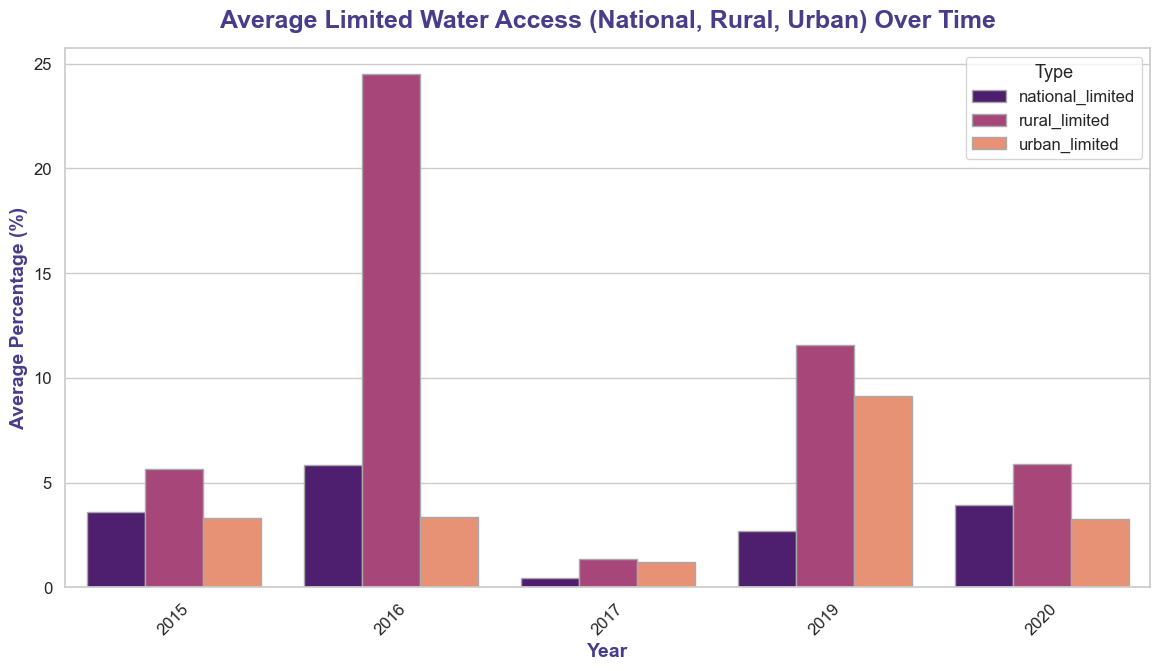

In [90]:

sns.set(style='whitegrid')

nat_lim_mean_melted = nat_lim_mean.melt(id_vars='Year', 
                                        value_vars=['national_limited', 'rural_limited', 'urban_limited'],
                                        var_name='Type', value_name='Mean Value')

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Year', y='Mean Value', hue='Type', data=nat_lim_mean_melted, 
                 palette='magma', edgecolor='darkgrey')

ax.set_title('Average Limited Water Access (National, Rural, Urban) Over Time',
             fontsize=18, fontweight='bold', color='DarkSlateBlue', pad=15)
ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='DarkSlateBlue')
ax.set_ylabel('Average Percentage (%)', fontsize=14, fontweight='bold', color='DarkSlateBlue')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', fontsize=12, title_fontsize='13', loc='upper right', frameon=True)

plt.show()


# Comparing among the mean of nationa,basic and rural unimproved over years

In [96]:
unimpr_mean = water_df.groupby('Year')[['national_unimproved', 'rural_unimproved', 'urban_unimproved']].mean().dropna()
unimpr_mean

,national_unimproved,rural_unimproved,urban_unimproved
Year,,,
2015,5.395704,10.290033,2.417342
2016,6.428359,20.075000,3.443750
2017,5.414482,46.286056,8.410314
2019,6.220557,11.519629,2.296775
2020,4.472643,8.818733,1.720383


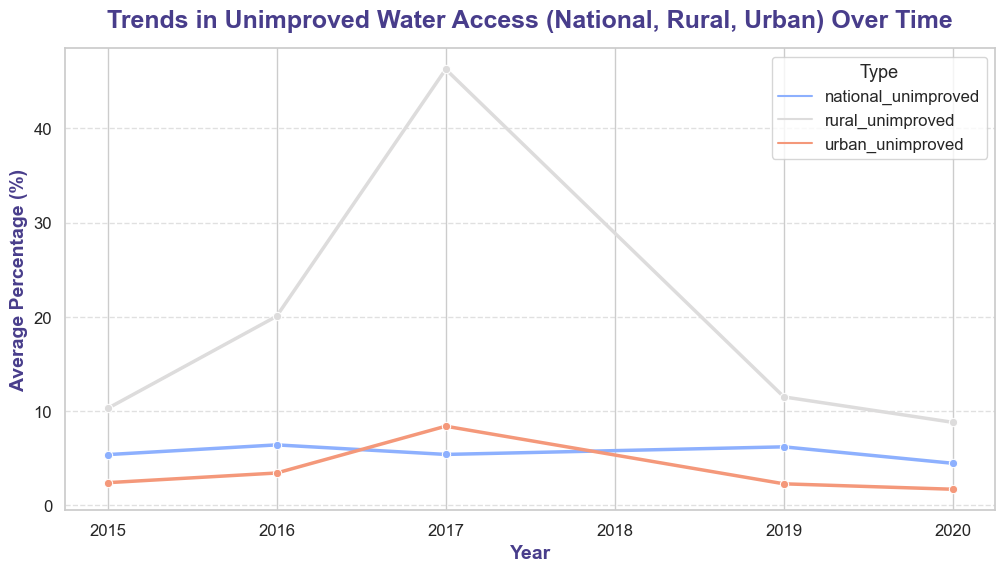

In [101]:

sns.set(style='whitegrid')

unimpr_mean_melted = unimpr_mean.reset_index().melt(id_vars='Year', 
                                                    value_vars=['national_unimproved', 'rural_unimproved', 'urban_unimproved'],
                                                    var_name='Type', value_name='Mean Value')

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Year', y='Mean Value', hue='Type', data=unimpr_mean_melted, 
                  palette='coolwarm', marker="o", linewidth=2.5)

ax.set_title('Trends in Unimproved Water Access (National, Rural, Urban) Over Time',
             fontsize=18, fontweight='bold', color='DarkSlateBlue', pad=15)
ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='DarkSlateBlue')
ax.set_ylabel('Average Percentage (%)', fontsize=14, fontweight='bold', color='DarkSlateBlue')



plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', fontsize=12, title_fontsize='13', loc='upper right', frameon=True)

plt.show()


# Comparing among the mean of nationa,basic and rural surface water over years

In [97]:
surface_mean = water_df.groupby('Year')[['national_surface', 'rural_surface', 'urban_surface']].mean().dropna()
surface_mean

,national_surface,rural_surface,urban_surface
Year,,,
2015,2.526325,5.712438,0.504842
2016,5.757975,27.625000,0.262500
2017,1.071424,21.584995,0.101550
2020,1.940291,4.260139,0.313115


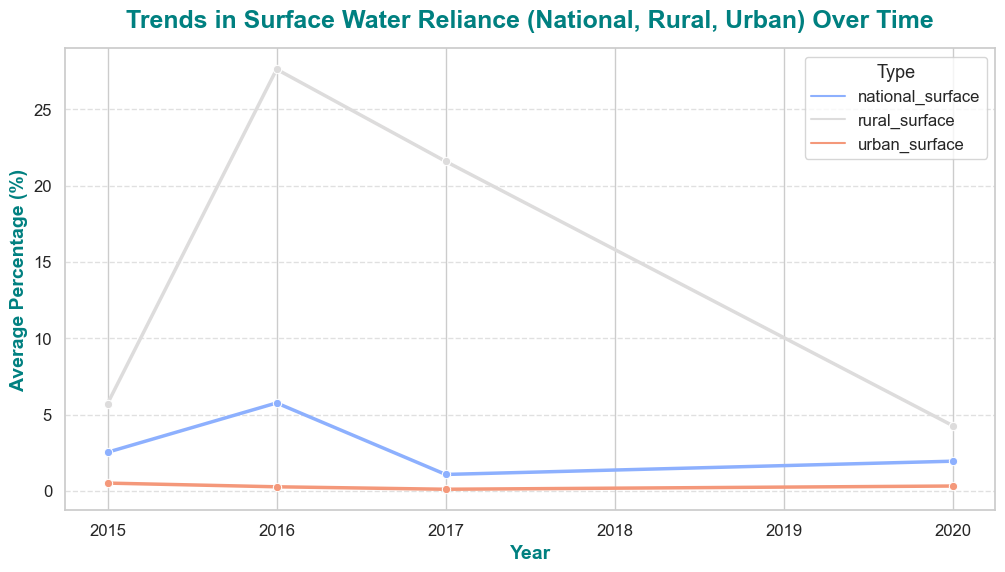

In [103]:
surface_mean_melted = surface_mean.reset_index().melt(id_vars='Year', 
                                                      value_vars=['national_surface', 'rural_surface', 'urban_surface'],
                                                      var_name='Type', value_name='Mean Value')


plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Year', y='Mean Value', hue='Type', data=surface_mean_melted, 
                  palette='coolwarm', marker="o", linewidth=2.5)


ax.set_title('Trends in Surface Water Reliance (National, Rural, Urban) Over Time',
             fontsize=18, fontweight='bold', color='Teal', pad=15)
ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='Teal')
ax.set_ylabel('Average Percentage (%)', fontsize=14, fontweight='bold', color='Teal')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', fontsize=12, title_fontsize='13', loc='upper right', frameon=True)

plt.show()
